In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ves

In [42]:
ab2 = np.logspace(0.5, 2.5, 21)
fopBlock = ves.VESModelling(ab2=ab2, nLayers=3)
synth = [10, 10, 100, 300, 30]
data = fopBlock(synth)
thk = np.logspace(0.1, 1, 15)
fop = ves.VESRhoModelling(ab2=ab2, thk=thk)

20/08/24 - 19:24:04 - pyGIMLi - INFO - Found 1 regions.


In [43]:
from pygimli.frameworks.inversion import GaussNewtonInversion
# startModel = [12, 12, 100, 100, 100]
startModel = pg.Vector(len(thk)+1, 100)
self = GaussNewtonInversion(fop=fop)
self.dataTrans = 'log'
self.modelTrans = 'log'
self.fop.createConstraints()
model1 = self.run(data, 0.03, lam=20, startModel=startModel, maxIter=5, verbose=True)

20/08/24 - 19:24:04 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ves.vesModelling.VESRhoModelling object at 0x000002C52B7C3810>
Data transformation: Logarithmic transform
Model transformation: Logarithmic transform
min/max (data): 31.1/126
min/max (error): 3%/3%
min/max (start model): 100/100
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  310.25
--------------------------------------------------------------------------------
inv.iter 1 ... dM:  16 [0.018890893317554405, -0.013689985907177415, -0.06498402680382097, 0.00916696292237185, 0.2289768216226028, 0.5062942734752116, 0.7200932366848737, 0.7718229704365064, 0.6148919240643438, 0.2626754610962938, -0.2199187059107753, -0.7359279257646378, -1.1808824219434837, -1.466345334744469, -1.5372361818980544, -1.3796535312649176]
tau:  0.9505
chi² =    4.05 (dPhi = 98.34%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... dM:  16 [0.01581496088436286, -0.03124617804159929

In [44]:
from pygimli.frameworks.inversion import ClassicInversion
inv = ClassicInversion(fop=fop)
inv.dataVals = data
inv.dataTrans = pg.trans.TransLog()
inv.modelTrans = pg.trans.TransLog()
model2 = inv.run(data, 0.03, lam=20, startModel=100, maxIter=5)

c:\Guenther.T\src\gimli\gimli\pygimli\viewer\mpl\modelview.py:116: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(pz[-1], pz[0])


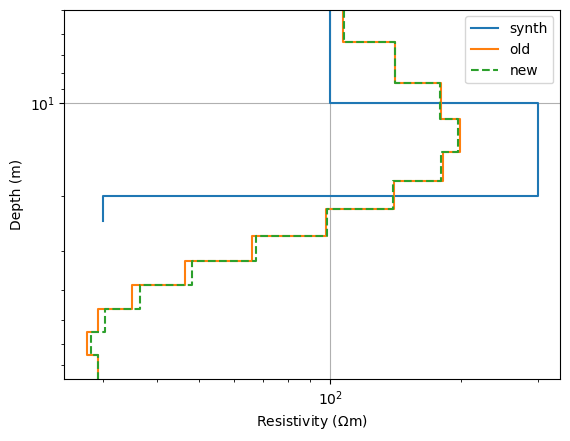

In [45]:
fig, ax = plt.subplots()
pg.viewer.mpl.drawModel1D(ax, model=synth, plot="loglog", label="synth")
pg.viewer.mpl.drawModel1D(ax, thk, model2, label="old")
pg.viewer.mpl.drawModel1D(ax, thk, model1, label="new", ls="--")
ax.legend()